# Final Project （Group 36） #


### Introduction: Manreet  
### Methods – Exploratory - Shuokai Huang
### Methods – predictive - Bennett  
### Discussion - Xiany  

## 1. Introduction

    In the gaming industry, understanding how much time a player spends in a game can help developers design better user experiences and refine marketing strategies. These improvements can make more players subscribe to game-related newsletters, in hopes of doing well in the game. However, not all players choose to subscribe to the newsletter, but identifying the factors that influence these decisions can help improve certain areas that need more effort.

	To better understand certain behaviours, our project investigates the following: Can total hours played on the Minecraft server and age predict whether the player will subscribe to the game-related newsletter in the players.csv dataset? Additionally, we explore how this changes based on experience level, as we may find different engagement patterns in each experience level. 
    
	To address this question, we used the players.csv dataset, which contained detailed information about Minecraft server users. The dataset included variables such as age, gender, total hours played, experience level, and whether they have subscribed to the newsletter. By applying classification techniques, we aim to model and predict newsletter subscription behaviour based on the data provided. 
    
	This method will not only provide insights for any observable patterns of player engagement, but also demonstrate the importance of using classification models in predictive analysis, building on previous individual analysis that focused more on descriptive and exploratory approaches.


## 2. Importing and Tidying data 

In [26]:
library(tidyverse)
library(tidymodels)

url = "https://drive.google.com/uc?export=download&id=1gl3xMGBBIjHpG4kwIY-g84_ijx2sQYIa"
players <- read_csv(url)
dim(players); head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 196   7

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


**First, we check whether there are any NAs in the data. If so, we need to remove them.**

In [27]:
clean_players <- players |>
map_lgl(anyNA)
clean_players 

experience    subscribe  hashedEmail played_hours         name       gender 
       FALSE        FALSE        FALSE        FALSE        FALSE        FALSE 
         Age 
        TRUE

**We found that only the Age column contained NAs, so we need to remove them. Additionally, we must exclude players with zero game duration, as they provide no useful data for this data analysis.**

In [28]:
clean_players <- players |>
filter(!is.na(Age)) |>
filter(played_hours>0)
head(clean_players)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47
Veteran,TRUE,7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,1.6,Lane,Female,23


In [29]:
clean_players$subscribe <- factor(clean_players$subscribe)

### Data Description

In [30]:
summary(clean_players)

  experience        subscribe  hashedEmail         played_hours   
 Length:109         FALSE:25   Length:109         Min.   :  0.10  
 Class :character   TRUE :84   Class :character   1st Qu.:  0.10  
 Mode  :character              Mode  :character   Median :  0.50  
                                                  Mean   : 10.51  
                                                  3rd Qu.:  1.80  
                                                  Max.   :223.10  
     name              gender               Age      
 Length:109         Length:109         Min.   : 9.0  
 Class :character   Class :character   1st Qu.:17.0  
 Mode  :character   Mode  :character   Median :20.0  
                                       Mean   :21.3  
                                       3rd Qu.:23.0  
                                       Max.   :58.0  

+ **Observation**:109
+ **Summary Statistics**:
  

   played_hours:  
   Min.   :  0.10  
   Median :  0.10    
   Mean   :  10.51   
   Max.   :  223.10    

   Age:  
   Min.   :  9.0   
   Median :  20.0    
   Mean   :  21.3   
   Max.   :  58.00  

   subscribe:  
   FALSE:25   
   TRUE :84   
+ **Variables**:7  
  1.experience: Categorical. The experience of the player has in Minecraft.  
  2.subscribe: Categorical. If the player subscribled to a game-related news.  
  3.hashedEmail: Categorical. The email of players.  
  4.played_hours: Numerical. The number of hours a player played on the PlaiCraft server.  
  5.name: Categorical. The players' names.  
  6.gender: Categorical. The players' gender.  
  7.Age: Numerical. The age of player.  

### **Visualization**

**1.We examined the age distribution of participants and their corresponding subscription status.**

**Figure 1.** Visualization of number of people subscribed to newsletter based on Age group

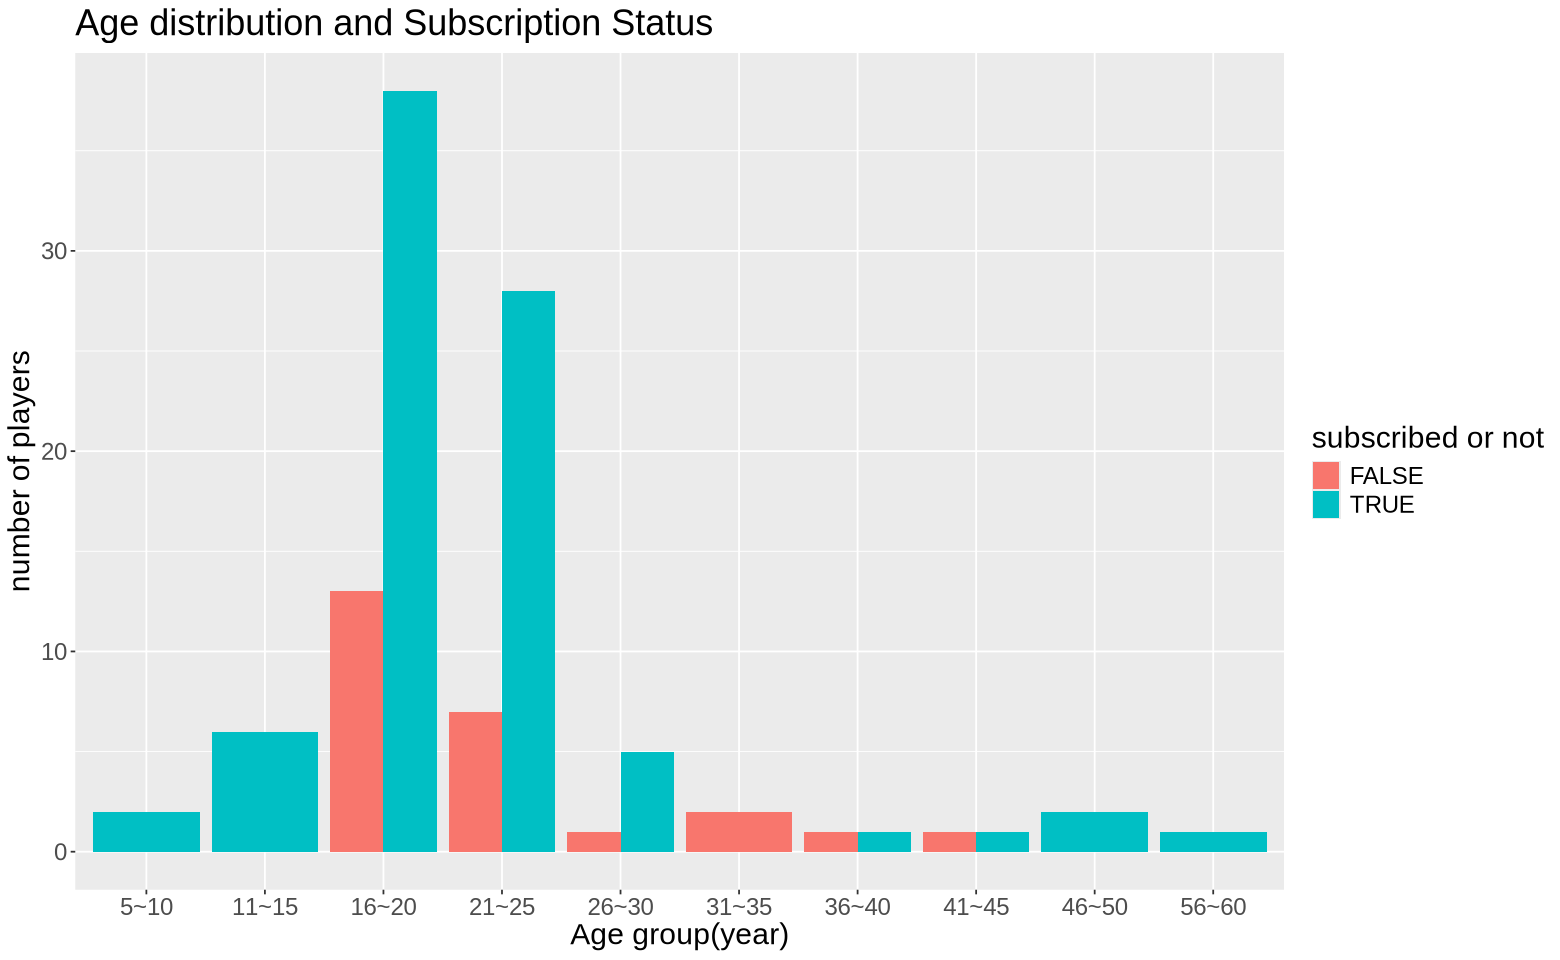

In [31]:
players_age <- mutate(clean_players, age_group = cut(Age, breaks= c(5,10,15,20,25,30,35,40,45,50,55,60), 
        labels = c("5~10", "11~15", "16~20", "21~25", "26~30", "31~35", "36~40", "41~45", "46~50", "51~55", "56~60")))

options(repr.plot.height = 8, repr.plot.width = 13)

age_distribution <- players_age |>
ggplot(aes(x = age_group, fill = subscribe)) +
geom_bar(position = "dodge") +
labs(x = "Age group(year)", y = "number of players", fill = "subscribed or not", 
     title = "Age distribution and Subscription Status ") +
theme(text= element_text(size=18))
age_distribution

**We can observe that the majority of participants are concentrated in the 16 to 25 age group, while those under 16 and over 45 show a pattern of consistently subscribing to the newsletter**

**2. We also examined subscription patterns when considering both gaming duration and age simultaneously.**

**Figure 2.** Subscription based on Age and Played Hours

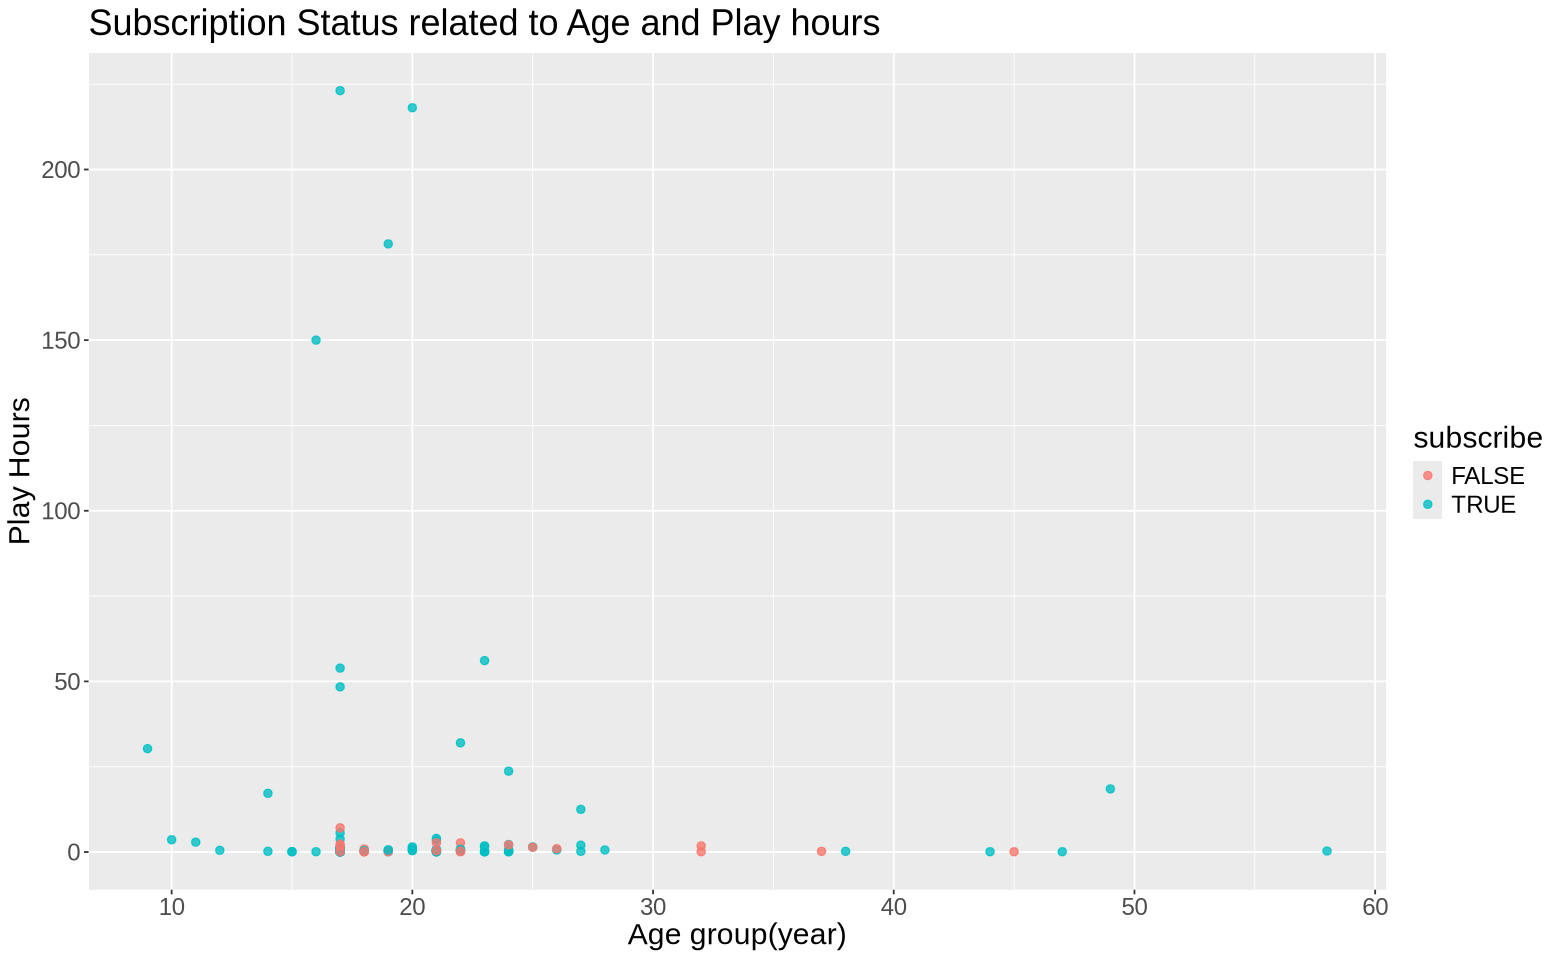

In [32]:
play_hours_distribution <- clean_players |>
ggplot(aes(x = Age, y = played_hours, colour = subscribe)) +
  geom_point(alpha = 0.8, size = 2) +
  labs(x = "Age group(year)", y = "Play Hours", fill = "subscribed or not", 
       title = "Subscription Status related to Age and Play hours") +
theme(text= element_text(size=18))
play_hours_distribution

**Given our visualization above, we can observe that all players with high playtime have subscribed, while those without subscriptions are concentrated in the under 10-hour range. From this, we can also tell that the majority of players have a low playtime**

**Figure 3.** Proportion of subscriptions to newsletter based on experience level and total playtime

`summarise()` has grouped output by 'experience', 'played_hours'. You can
override using the `.groups` argument.


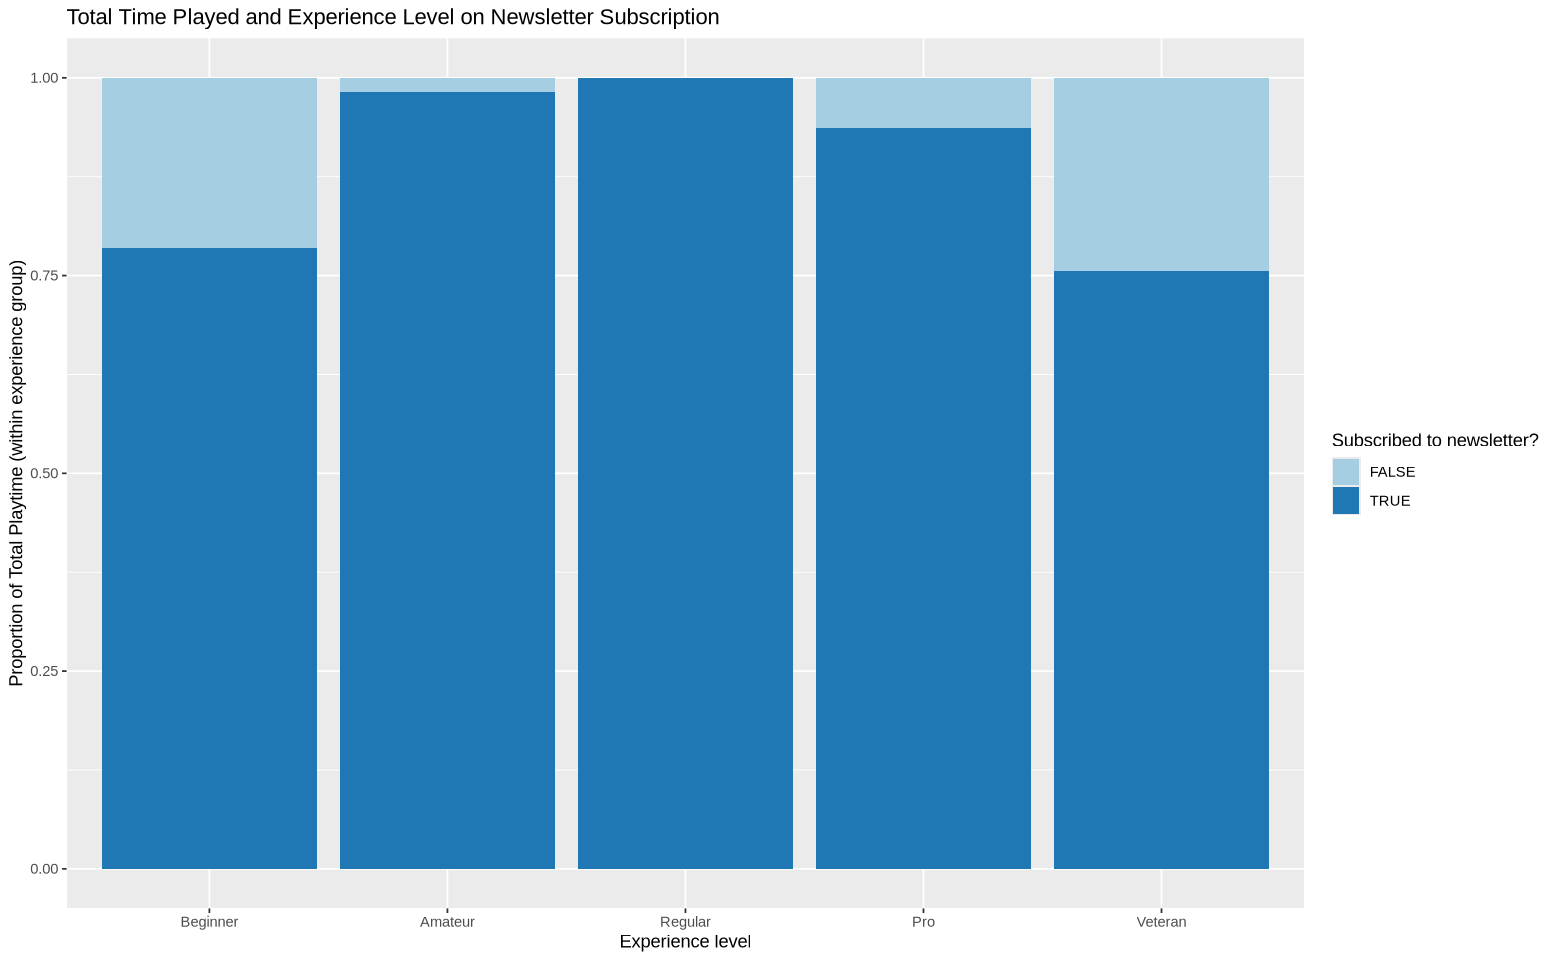

In [33]:
players_tidy <- clean_players |>
  mutate(
    experience = factor(
      experience,
      levels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran")))
players_plot <- players_tidy|> 
group_by(experience, played_hours, subscribe) |>
summarise(total_hours = sum(played_hours, na.rm = TRUE))|>
ggplot(aes(x = experience, y = total_hours, fill = subscribe)) + 
geom_bar(stat = "identity", position = "fill") + 
scale_fill_brewer(palette = "Paired") +
labs(title = "Total Time Played and Experience Level on Newsletter Subscription", x = "Experience level", y = "Proportion of Total Playtime (within experience group)", fill = "Subscribed to newsletter?")
players_plot

options(repr.plot.width = 10, repr.plot.height = 6)

### **Predictive Analysis**

In order to answer our question, we must use a method that allows us to predict whether or not a given player will subscribe to the dataset based on their hours played and age.

The chosen method that we used was the K-nearest neighbors classification algorithm. This classifier is used to generally find the K "nearest" or "most similar" observaton in our training set, and then using their diagnoses to create a predicioton for the new observations diagnosis(Timbers, 2024). 

When considering the use of the model, we were sure to scale the variables involved. Since the classifier predicts classes by identifying observations nearest to it, any variables with a large scale will have a much larger effect than variables with a small scale. However, this is not the case. Within our dataset, we must ensure that all the variables are weighted equally as they are both responsible for determining whether a person is likely to subscribe to the newsletter (Timbers, 2024). 

Likewise, the data will also be centered. When we do this, the data is said to be standardized, and all the variables will have a mean of 0 and a standard deviation of 1. 

It is worth mentioning that the value of K is important when useing the K-nearest neighbors algorithm. By picking different values of K, we create different classifiers that make different predictions. Using the training dataset (in this case called a validation set), we will perform cross validation. Cross validation splits the trainign data into folds, from which it uses each fold to to test and train the model to get a more reliable estimate(prevents overfitting)(Timbers, 2024). Specifically for our analysis, the method we will use is 5-fold cross-validation (5 different choices for the validation set). 



In [34]:
set.seed(1)
players_pred <- players |>
    select(experience, Age, played_hours, subscribe) |>
    filter(Age != "NA") |>
    mutate(subscribe = as_factor(subscribe)) |>
    mutate(subscribe = fct_recode(subscribe, "Subscribed" = "TRUE", "Not Subscribed" = "FALSE"))
players_pred


experience,Age,played_hours,subscribe
<chr>,<dbl>,<dbl>,<fct>
Pro,9,30.3,Subscribed
Veteran,17,3.8,Subscribed
Veteran,17,0.0,Not Subscribed
Amateur,21,0.7,Subscribed
Regular,21,0.1,Subscribed
Amateur,17,0.0,Subscribed
Regular,19,0.0,Subscribed
Amateur,21,0.0,Not Subscribed
Amateur,47,0.1,Subscribed


In [35]:


players_split <- initial_split(players_pred, prop = 0.75, strata = subscribe)
players_train <- training(players_split) 
players_test <- testing(players_split)


players_vfold <- vfold_cv(players_train, v = 5, strata = subscribe)


knn_spec_tune <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")


player_train_recipe <- recipe(subscribe ~ Age + played_hours, data = players_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())


k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 3))


knn_results <- workflow() |>
  add_recipe(player_train_recipe) |>
  add_model(knn_spec_tune) |>
  tune_grid(resamples = players_vfold, grid = k_vals) |>
  collect_metrics()


accuracies <- knn_results |>
    filter(.metric == "accuracy")
accuracies


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4549261,5,0.020803697,Preprocessor1_Model01
4,accuracy,binary,0.5098686,5,0.031175564,Preprocessor1_Model02
7,accuracy,binary,0.5645813,5,0.031504803,Preprocessor1_Model03
10,accuracy,binary,0.5712479,5,0.040381725,Preprocessor1_Model04
13,accuracy,binary,0.6746962,5,0.058945543,Preprocessor1_Model05
16,accuracy,binary,0.6902135,5,0.026906134,Preprocessor1_Model06
19,accuracy,binary,0.7380296,5,0.022821443,Preprocessor1_Model07
22,accuracy,binary,0.7242365,5,0.009666225,Preprocessor1_Model08
25,accuracy,binary,0.7309031,5,0.007555936,Preprocessor1_Model09


neighbors,mean,percent accuracy
<dbl>,<dbl>,<dbl>
28,0.7382759,73.82759


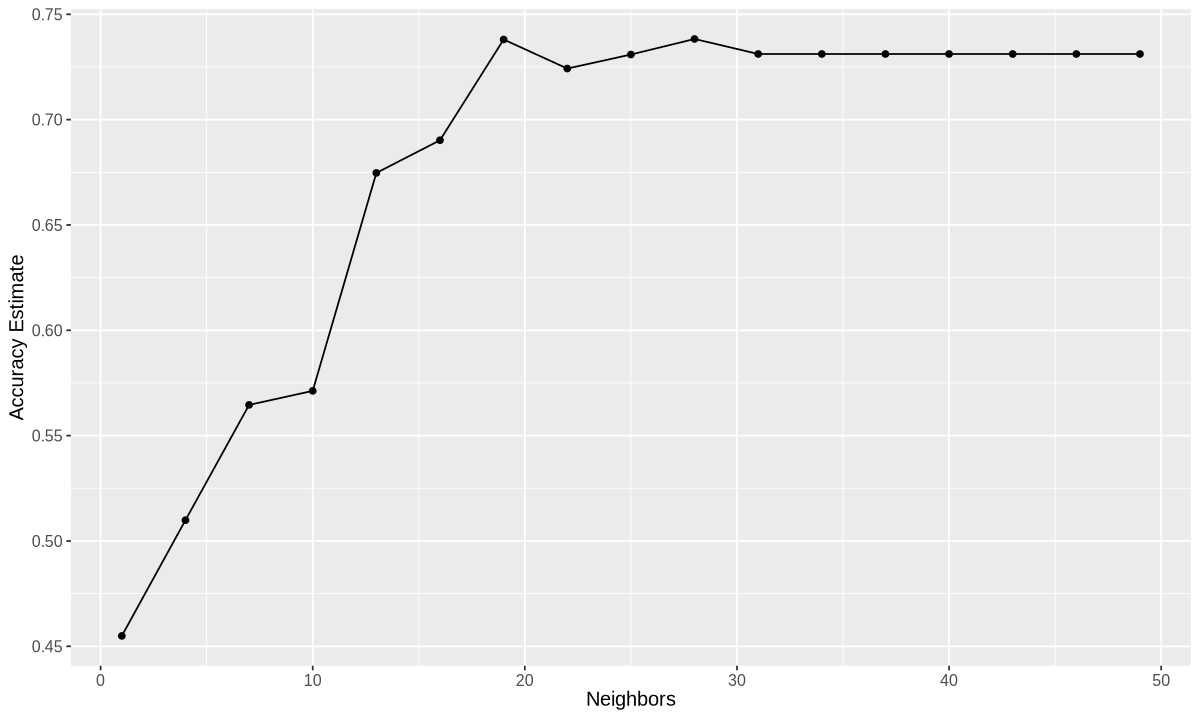

In [36]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12))
accuracy_vs_k
best_k <- accuracies |>
    arrange(desc(mean)) |>
    head(1) |>
    select(neighbors, mean) |>
    mutate("percent accuracy" = mean*100)
best_k


In [37]:
players_train_prop <- players_train |>
    group_by(subscribe) |>
    summarize(n = n()) |>
    mutate(percent = 100*n/nrow(players_train))
players_train_prop


subscribe,n,percent
<fct>,<int>,<dbl>
Not Subscribed,39,26.89655
Subscribed,106,73.10345


In [38]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 19) |>
    set_engine("kknn") |>
    set_mode("classification")


player_recipe <- recipe(subscribe ~ Age + played_hours, data = players_pred) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())


knn_fit <- workflow() |>
    add_recipe(player_recipe) |>
    add_model(knn_spec) |>
    fit(data = players_train)
knn_fit


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(19,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2896552
Best kernel: rectangular
Best k: 19

In [39]:
players_prediction <- predict(knn_fit, players_test) |>
    bind_cols(players_test) 
players_prediction


.pred_class,experience,Age,played_hours,subscribe
<fct>,<chr>,<dbl>,<dbl>,<fct>
Subscribed,Amateur,21,0.7,Subscribed
Subscribed,Regular,21,0.1,Subscribed
Subscribed,Amateur,17,0.0,Subscribed
Subscribed,Regular,19,0.0,Subscribed
Subscribed,Amateur,21,0.0,Not Subscribed
Subscribed,Veteran,22,0.0,Subscribed
Subscribed,Veteran,23,1.6,Subscribed
Subscribed,Beginner,25,1.5,Subscribed
Subscribed,Amateur,22,0.2,Subscribed


In [40]:
players_prediction |>
    metrics(truth = subscribe, estimate = .pred_class) |>
    filter(.metric == "accuracy")


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6734694


In [41]:
players_prediction |> pull(subscribe) |> levels()


players_prediction |>
    precision(truth = subscribe, estimate = .pred_class, event_level = "second")


[1] "Not Subscribed" "Subscribed"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.7272727


In [42]:
players_prediction |>
    recall(truth = subscribe, estimate = .pred_class, event_level = "second")


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.8888889


In [44]:
confusion <- players_prediction |>
    conf_mat(truth = subscribe, estimate = .pred_class)
confusion



                Truth
Prediction       Not Subscribed Subscribed
  Not Subscribed              1          4
  Subscribed                 12         32

Sources: 

Timbers, T. (2024, August 21). Chapter 5 Classification I: training & predicting |  Data Science. Datasciencebook.ca.  
    https://datasciencebook.ca/classification1.html#classification-with-k-nearest-neighbors